## Task- KMeans for Breast_Cancer_Dataset

### What is Breast Cancer?
   Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

### About the dataset

   Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei.

**Attribute Information:**

Ten real-valued features are computed for each cell nucleus (3–32):

a) radius (mean of distances from the center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter² / area — 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension (“coastline approximation” — 1)

### what is KMean?
   The algorithm we will use to perform segmentation analysis is K-Means clustering. K-Means is a partitioned based algorithm that performs well on medium/large datasets. The algorithm is an unsupervised learning algorithm that utilizes similarities in the data to create groups without labels.


#### ***Installing the required modules***

In [1]:
!pip install yellowbrick

In [2]:
!pip install kneed

***Importing Necessary libraries***

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

***Loading the dataset***

In [4]:
from sklearn.datasets import load_breast_cancer
data =load_breast_cancer()


***Loading Dataset into Pandas Data frame***

In [5]:
df=pd.DataFrame(data=data.data, columns=data.feature_names)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***Information of dataset***

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are 30 columns and 569 rows with float data type.

***Statistical Description of Data***

In [8]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


***Checking Null Values***

In [9]:
print("no. of null values in each of the columns in the above dataset are as follows:\n",df.isnull().sum())

no. of null values in each of the columns in the above dataset are as follows:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


From the above, we come to know that the given data set does not contain any null values

After checking various aspects like null values count, missing values count, and info.
This dataset is perfect because of no Null and missing values.

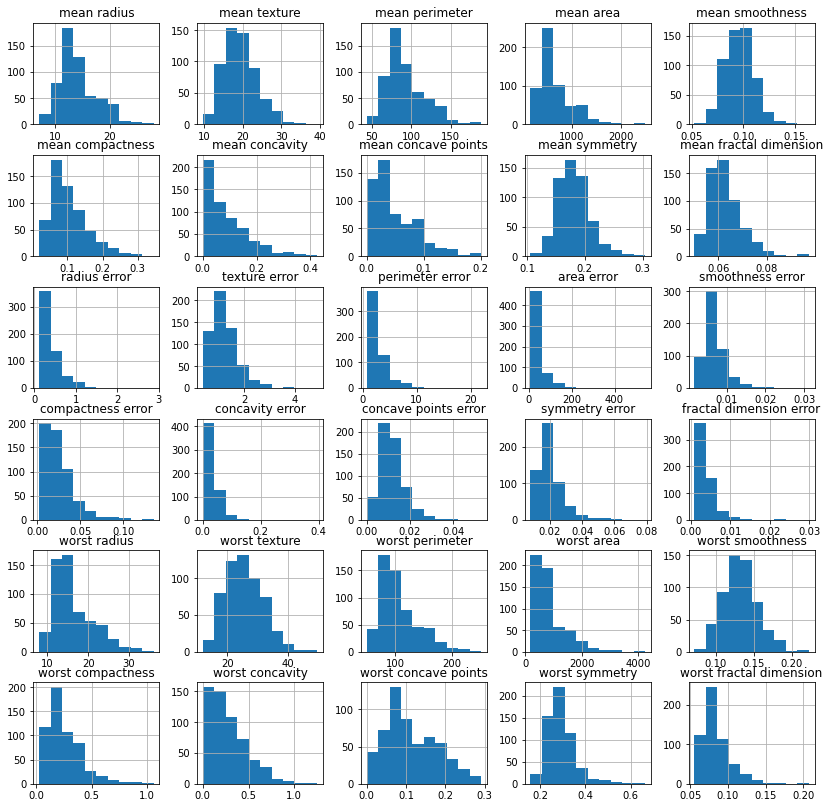

In [10]:
df.hist(figsize=(14,14))
plt.show()


<AxesSubplot:>

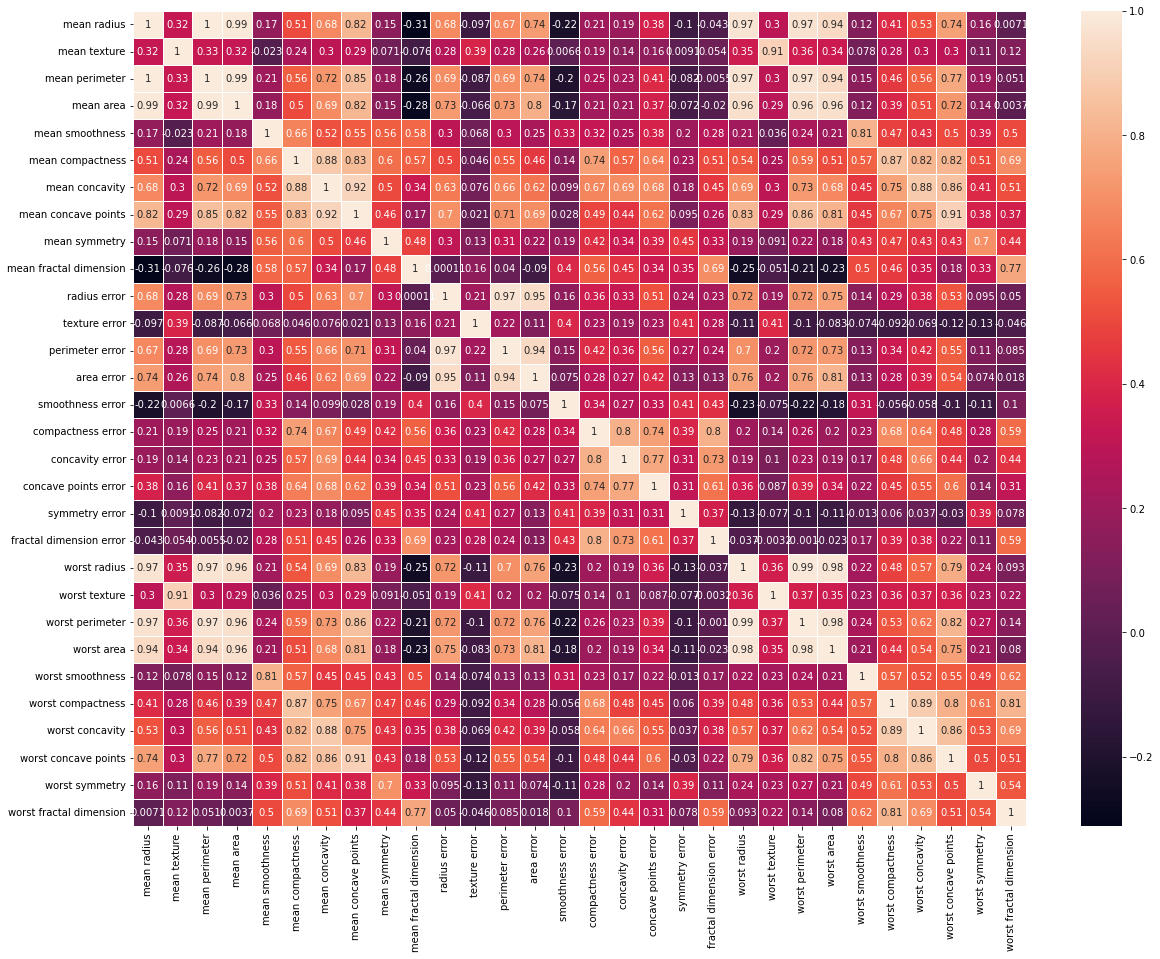

In [11]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5)

<AxesSubplot:ylabel='mean perimeter'>

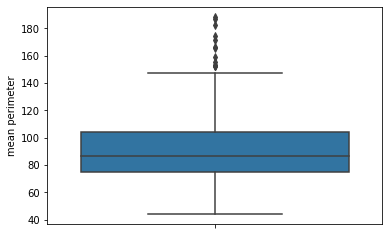

In [12]:
sns.boxplot(y=df["mean perimeter"])

## Using the elbow method to find the optimal number of clusters

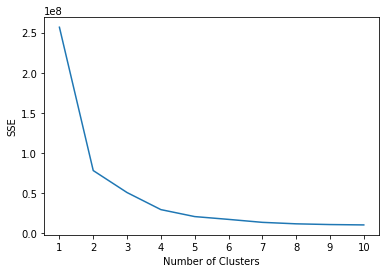

In [14]:
from sklearn.cluster import KMeans
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

print("The optimal no. of clusters is ",kl.elbow)

The optimal no. of clusters is  3


### K Means Clustering

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [17]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [18]:
kmeans.cluster_centers_

array([[1.24751725e+01, 1.84901166e+01, 8.05764103e+01, 4.88859207e+02,
        9.49148252e-02, 9.07750117e-02, 6.15064119e-02, 3.29390303e-02,
        1.77986946e-01, 6.35734266e-02, 3.01556410e-01, 1.21532704e+00,
        2.13489441e+00, 2.33540979e+01, 7.15913287e-03, 2.33434848e-02,
        2.84384956e-02, 1.05576713e-02, 2.06707646e-02, 3.74588648e-03,
        1.39398578e+01, 2.45990443e+01, 9.12271096e+01, 6.09272261e+02,
        1.30029254e-01, 2.22372145e-01, 2.16939503e-01, 9.04745711e-02,
        2.82924942e-01, 8.33942191e-02],
       [1.85285124e+01, 2.15790909e+01, 1.22283471e+02, 1.07481240e+03,
        1.00261240e-01, 1.41826612e-01, 1.61977355e-01, 9.20814050e-02,
        1.91676860e-01, 6.06204959e-02, 6.49142149e-01, 1.21641983e+00,
        4.56371901e+00, 7.68210744e+01, 6.61174380e-03, 3.13276529e-02,
        4.16239669e-02, 1.55374463e-02, 2.01668595e-02, 3.96714050e-03,
        2.23823967e+01, 2.87747107e+01, 1.49064463e+02, 1.54647107e+03,
        1.39227107e-01,

In [19]:
#append cluster assingments to original DataFrame
df['cluster'] = kmeans.labels_

***Reducing the dimensions in order to visualize the clusters***

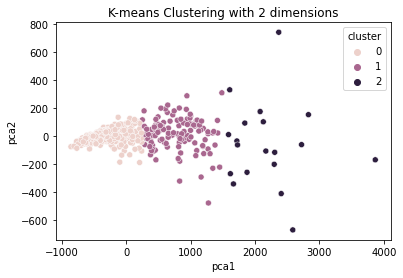

In [20]:
from sklearn import decomposition
pca_num_components = 2

reduced_data = decomposition.PCA(n_components=pca_num_components).fit_transform(df.iloc[:,0:29])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

***Evaluation using the silhouette score***

In [22]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.675


***Comparison of Kmean clustering for different no. of clusters***

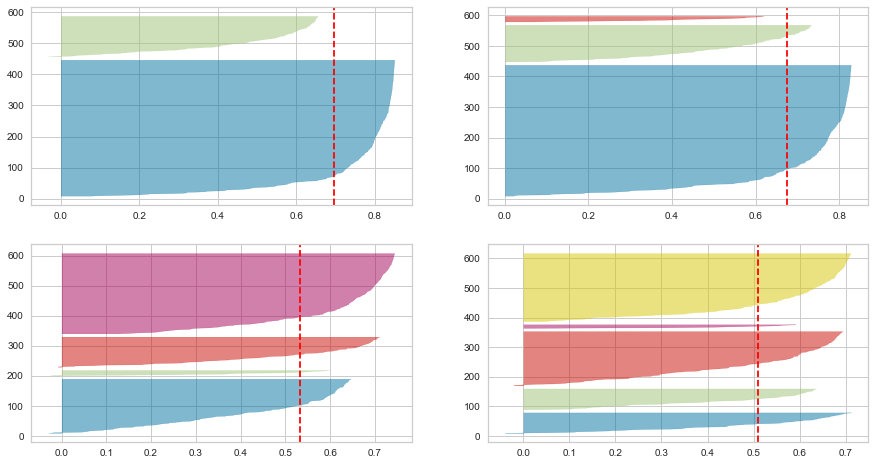

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

**From the above, we comw to know that that the silhoutte score for 2 clusters is also somewhat same as 3 clusters. let us try to with no. of . cluster as 2**

In [27]:
data=df.drop(["cluster"],axis=1)

In [28]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 41)
y_km = km.fit_predict(data)

In [29]:
data['cluster'] = km.labels_

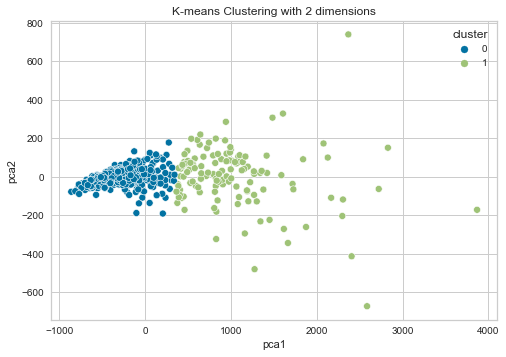

In [31]:
from sklearn import decomposition
pca_num_components = 2

reduced_data_1 = decomposition.PCA(n_components=pca_num_components).fit_transform(data.iloc[:,0:29])
results_1 = pd.DataFrame(reduced_data_1,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['cluster'], data=results_1)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [32]:
#silhoutte score for 2 clusters
from sklearn.metrics import silhouette_score

score = silhouette_score(df, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.675


##                                         _THANK YOU!_